In [1733]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [1734]:
def loss_function(x):
    return 0 if x > 0 else 1

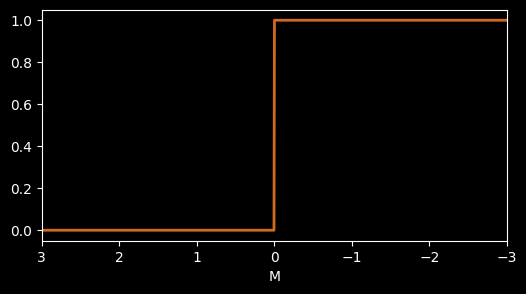

In [1735]:
# Loss function (step function)

dots = np.linspace(-3, 3, 1000)
q_zero_one_loss = [loss_function(x) for x in dots]


plt.figure(figsize=(6, 3))
plt.plot(dots.reshape(-1, 1), q_zero_one_loss, c='chocolate', linewidth=2)
plt.xlabel('M')
plt.xlim(3, -3)
plt.show()

In [1736]:
def exp_loss(x):
    return np.exp(-x)

#### Logistic loss
$\frac{\log_3 5}{\log_3 2}={\log_2 5}$

In [1737]:
def logistic_loss(x):
    return np.log2(1 + np.exp(-x))

# logistic_loss == logistic_loss2
def logistic_loss2(x):
    return 1/np.log(2)*np.log(1 + np.exp(-x))

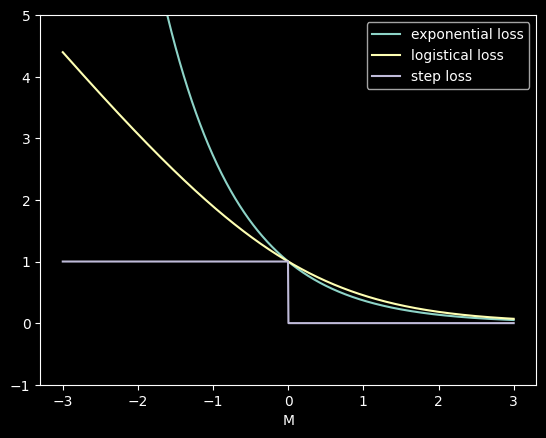

In [1738]:
q_exp_loss = [exp_loss(x) for x in dots]
q_log_loss = [logistic_loss(x) for x in dots]


plt.figure()
plt.xlabel('M')
plt.plot(dots, q_exp_loss, label='exponential loss')
plt.plot(dots, q_log_loss, label='logistical loss')
plt.plot(dots, q_zero_one_loss, label='step loss')
plt.legend()
plt.ylim(-1, 5)
plt.show()

In [1739]:
# Convert y => <w,X> to range [0;1]
# Sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

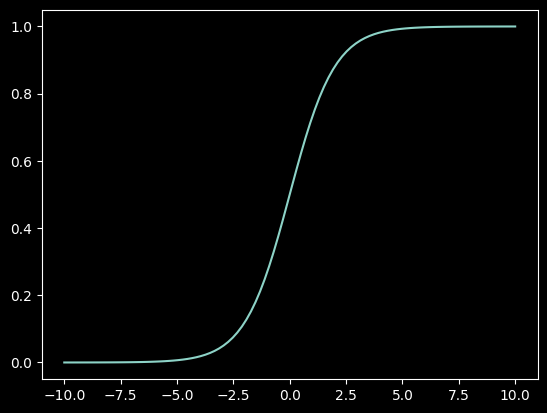

In [1740]:
# the more <w,x> the more P
dots = np.linspace(-10, 10, 100)  # <w, X>
targets = list(map(sigmoid, dots))

plt.plot(dots, targets)
plt.show()

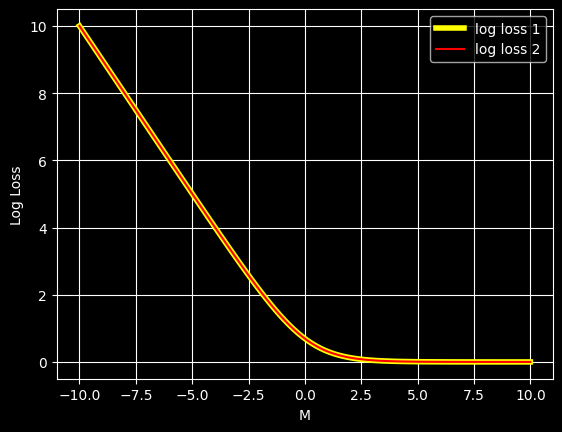

In [1741]:
dots = np.linspace(-10, 10, 100)
log_loss_value1 = list(map(lambda x: -np.log(1 / (1+np.exp(-x))), dots))
log_loss_value2 = list(map(lambda x: np.log(1 + np.exp(-x)), dots))

plt.xlabel('M')
plt.ylabel('Log Loss')
plt.grid()
plt.plot(dots, log_loss_value1, c='yellow', label='log loss 1', linewidth=4)
plt.plot(dots, log_loss_value2, c='red', label='log loss 2')
plt.legend()
plt.show()

In [1742]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)
# X, y = datasets.make_blobs(centers=2, cluster_std=2.5, random_state=12)
display(X, y, X.shape, y.shape)

array([[ 1.30022717, -0.7856539 ],
       [ 1.44184425, -0.56008554],
       [-0.84792445, -1.36621324],
       [-0.72215015, -1.41129414],
       [-1.27221465,  0.25945106],
       [ 0.78694271,  0.94294879],
       [ 0.81695766, -1.12478707],
       [ 1.6822707 , -0.67596877],
       [-1.07223343, -0.7701513 ],
       [-0.06539297,  1.11257376],
       [-1.33232952,  0.60245671],
       [-0.6963714 ,  0.96382716],
       [ 0.82340614,  0.7561926 ],
       [-1.5155534 , -0.15804853],
       [-0.78971776,  1.70347973],
       [ 0.85887841,  1.04457966],
       [-0.45001335,  0.27345841],
       [ 0.7099324 ,  0.69020919],
       [-0.79095935,  1.60495551],
       [-1.08077536, -1.15530746],
       [-1.5691733 , -0.54054806],
       [-0.52568843,  1.52568161],
       [-1.27406042, -0.1434304 ],
       [ 0.89621114, -1.11509679],
       [-0.85259895, -1.42554982],
       [-0.63262806,  1.2217558 ],
       [-0.86447712, -1.40921978],
       [-0.47819102,  3.17462483],
       [-1.25230004,

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

(100, 2)

(100,)

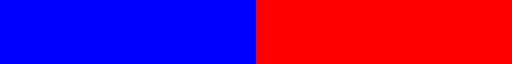

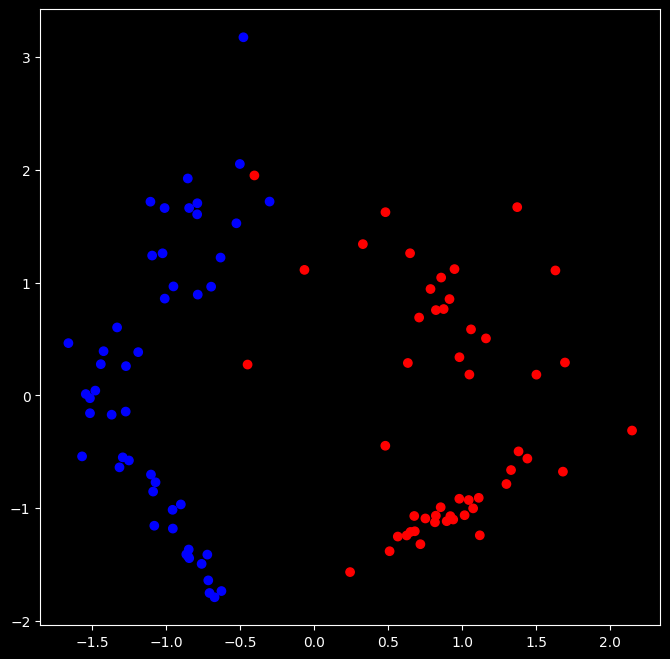

In [1743]:
colors = ListedColormap(['blue', 'red'])
display(colors)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
plt.show()

In [1744]:
# mix dataset
shuffle_index = np.random.permutation(X.shape[0]) # shuffle indexes 0-100
display(shuffle_index)
X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

# train test
train_proportion = 0.7

train_test_cut = int(len(X) * train_proportion)

X_train = X_shuffled[0: train_test_cut]
X_test = X_shuffled[train_test_cut:]
y_train = y_shuffled[0: train_test_cut]
y_test = y_shuffled[train_test_cut:]

print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

array([76, 10,  4, 99, 70, 66, 30, 45, 94, 11, 78, 47,  0, 79, 18, 51, 55,
       77, 65, 42, 12, 36, 67, 26, 22, 31, 56, 96, 15, 44, 89, 88,  9, 33,
       68, 60, 28, 40,  5, 53, 81, 39, 35, 16, 80, 34,  7, 43, 64, 71, 27,
       19, 98, 91, 25, 62, 49, 13, 24,  3, 17, 38,  8, 83,  6, 69, 93, 85,
       54, 50, 72, 46, 73, 61, 14, 84, 41, 58, 48, 92, 57, 75, 32, 20, 59,
       63, 90, 37, 29, 95,  1, 52, 21,  2, 23, 87, 97, 74, 86, 82])

X_train: (70, 2), X_test: (30, 2), y_train: (70,), y_test: (30,)


#### LogLoss

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$

#### Derivative LogLoss (gradient)
$$\frac{dL}{dw} =X^{T}(\sigma-Y)$$

#### If yi = 1 or -1

$$\text{ln}L = \sum^{l}_{i=1} \text{ln}(1 + exp(-y{\langle w,x \rangle})$$

In [1745]:
# LogLoss with gradient
# mean LogLoss: 1 / m
def log_loss(w, X, y):
    m = X.shape[0]  # 100 samples
    P = sigmoid(np.dot(X, w))  # list of probability [0 to 1]

    # labels = [0, 1]
    loss = -1.0 / m * np.sum(y * np.log(P) + (1 - y) * np.log(1 - P))

    # labels = [-1, 1]
    # temp_y = np.where( y == 1, 1, -1)
    # loss = 1.0/m * np.sum(1 + np.exp(-temp_y * np.dot(X, w)))

    grad = 1.0 / m * np.dot(X.T, (P - y))

    return loss ,grad

In [1746]:
# gradient descent
def optimize(w, X, y, n_iters, eta):
    losses = []

    for i in range(n_iters):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)

    return w, losses

In [1747]:
def predict(w, X):
    m = X.shape[0]  # 100 samples

    y_predicted = np.zeros(m)  # 100 * [0]
    P = np.squeeze(sigmoid(np.dot(X, w)))  # may be to appear new dimensional

    # P = 0.5
    for i in range(P.shape[0]):
        if P[i] > 0.5:
            y_predicted[i] = 1

        elif P[i] <= 0.5:
            y_predicted[i] = 0

    return y_predicted

In [1748]:
w0 = np.zeros(X_train.shape[1])

n_iters = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iters, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

train_accuracy = np.mean(y_predicted_train == y_train) * 100.0
test_accuracy = np.mean(y_predicted_test == y_test) * 100.0

print(w)
print(f'{train_accuracy:.3f}')
print(f'{test_accuracy:.3f}')

[3.67924927 0.17378987]
95.714
100.000


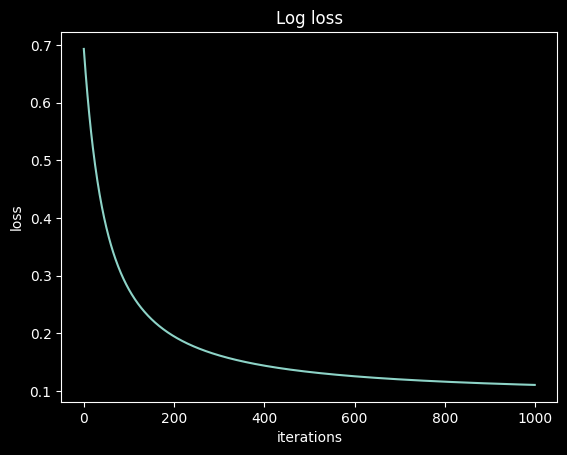

In [1749]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)
plt.show()

(597, 482)
(597, 482)


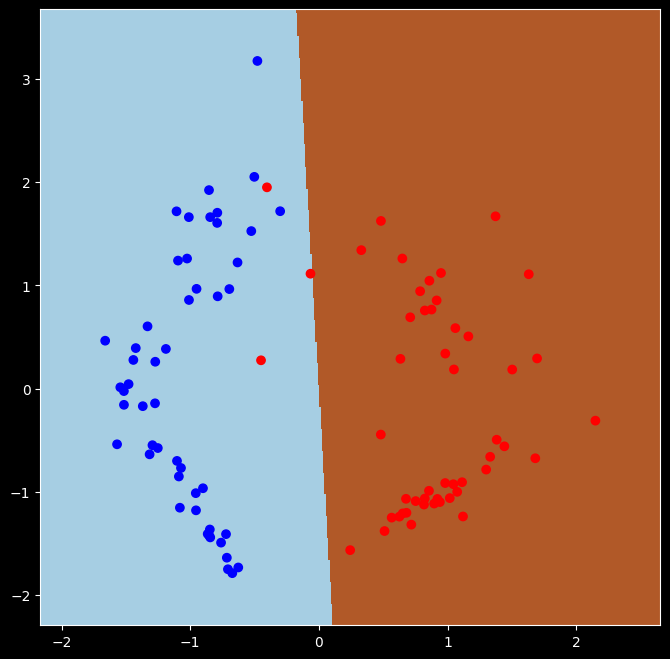

In [1750]:
# visualization Logistical regression

plt.figure(figsize=(8, 8))
padding = 0.5  # add space in graph
x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding

h = 0.01  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.shape)
Z = predict(w, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
print(Z.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
plt.show()

#### Assessment of classification quality
$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

Precision
$$precision(a, X) = \frac{TP}{TP+FP}.$$

Recall
$$recall(a, X) = \frac{TP}{TP+FN},$$

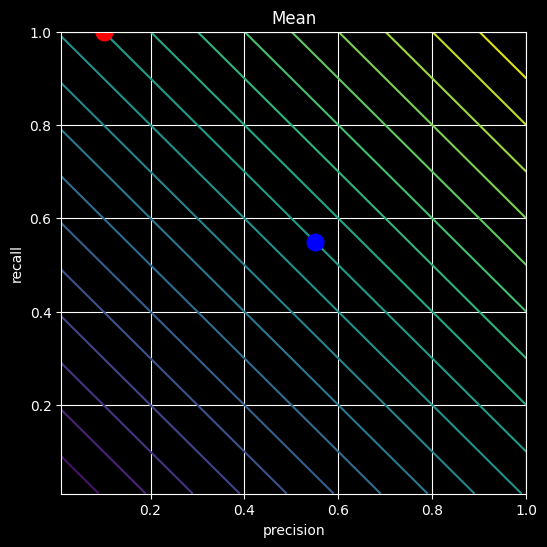

Test 1 (red): (0.1+1)/2 => 0.55
Test 2 (blue): (0.55+0.55)/2 => 0.55


In [1751]:
# example 1: Mean: (precision + recall) / 2  # bad model

precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

mean_levels = np.empty_like(precisions)

for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        mean_levels[i, j] = 1/2 * (precisions[i, j] + recalls[i, j])

plt.figure(figsize=(6, 6))
plt.title('Mean')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, mean_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.55, 0.55, 'bo', ms=12)
plt.show()

print(f'Test 1 (red): (0.1+1)/2 => {(0.1+1)/2}')
print(f'Test 2 (blue): (0.55+0.55)/2 => {(0.1+1)/2}')

# Example: if  recall - small & precision - big
#          or  recall - big & precision - small
#          a mean - not show difference

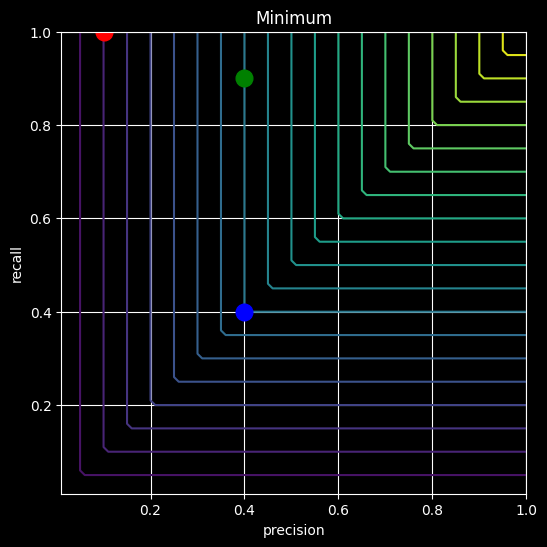

Test 1 (red): 0.1, 1 => 0.1
Test 2 (blue): 0.4, 0.4 => 0.4
Test 3 (green): 0.4, 0.9 => 0.4


In [1752]:
# min values  # bad model

min_levels = np.empty_like(precisions)

for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        min_levels[i, j] = min([precisions[i, j], recalls[i, j]])

plt.figure(figsize=(6, 6))
plt.title('Minimum')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, min_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.4, 0.4, 'bo', ms=12)
plt.plot(0.4, 0.9, 'go', ms=12)
plt.show()

print(f'Test 1 (red): 0.1, 1 => {min([0.1, 1])}')
print(f'Test 2 (blue): 0.4, 0.4 => {min([0.4, 0.4])}')
print(f'Test 3 (green): 0.4, 0.9 => {min([0.4, 0.9])}')

# Example: large values are not taken

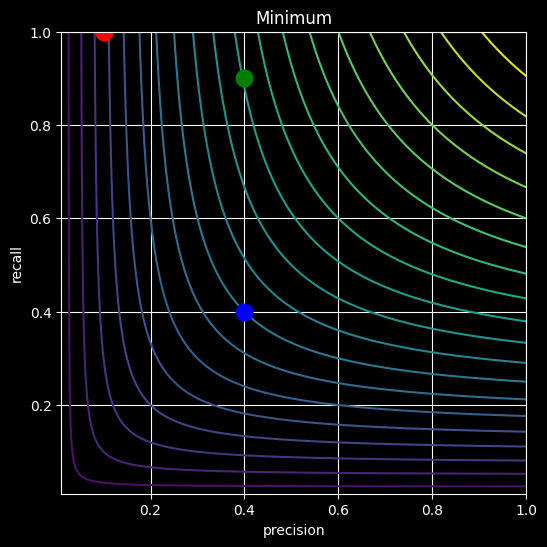

Test 1 (red): 0.1, 1 => 0.18181818181818182
Test 2 (blue): 0.4, 0.4 => 0.4000000000000001
Test 3 (green): 0.4, 0.9 => 0.5538461538461539


In [1753]:
f_levels = np.empty_like(precisions)

def f_level(precision, recall):
    return 2 * precision * recall / (precision + recall)

for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = f_level(precisions[i, j], recalls[i, j])

plt.figure(figsize=(6, 6))
plt.title('Minimum')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.4, 0.4, 'bo', ms=12)
plt.plot(0.4, 0.9, 'go', ms=12)
plt.show()

print(f'Test 1 (red): 0.1, 1 => {f_level(0.1, 1)}')
print(f'Test 2 (blue): 0.4, 0.4 => {f_level(0.4, 0.4)}')
print(f'Test 3 (green): 0.4, 0.9 => {f_level(0.4, 0.9)}')

# Example: different values - good model

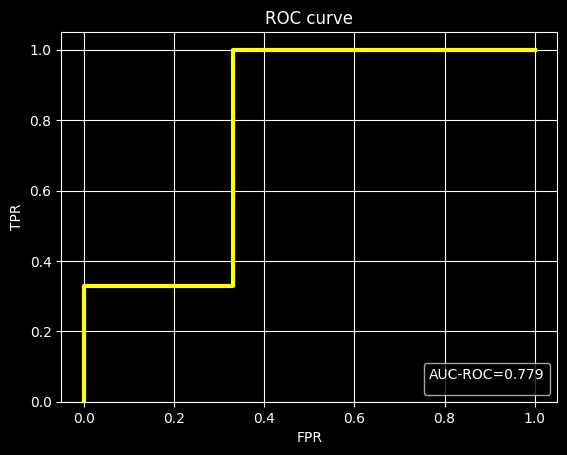

In [1754]:
# ROC-curve

from numpy import trapz
# trapz determines area under curve

TPR = [0, 0.33, 0.33, 0.66, 1, 1, 1]
FPR = [0, 0, 0.33, 0.33, 0.33, 0.66, 1]

AUC_ROC = trapz(TPR, x=FPR, dx=0.1)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR, TPR, c='yellow', linewidth=3)
plt.show()

# Practice

In [1755]:

X = np.array([
    [1, 1, 500, 1],
    [1, 1, 700, 1],
    [1, 2, 750, 2],
    [1, 5, 600, 1],
    [1, 3, 1450, 2],
    [1, 0, 800, 1],
    [1, 5, 1500, 3],
    [1, 10, 2000, 3],
    [1, 1, 450, 1],
    [1, 2, 1000, 2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.int16)

In [1756]:
def standard_scale(x):
    return (x - x.mean())/ x.std()

In [1757]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X_st[:, 2])

In [1758]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [1759]:
def calc_log_loss(y, y_pred):
    y_pred[y_pred == 0] = 1e-5
    y_pred[y_pred == 1] = 0.99999
    err = - np.mean(y * np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
    return err

In [1760]:
# Example
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_log_loss(y1, y_pred1)

0.164252033486018

In [1761]:
# Bad example
y1 = np.array([1, 0])
y_pred1 = np.array([0, 0.2])
calc_log_loss(y1, y_pred1)

5.86803450814222

In [1762]:
def sigmoid(y):
    return 1 / (1 + np.exp(-y))

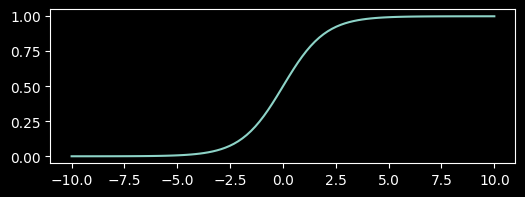

In [1763]:
z = np.linspace(-10, 10, 100)

plt.figure(figsize=(6, 2))
plt.plot(z, sigmoid(z))
plt.show()

In [1764]:
# Logistic regression
def eval_model(X, y, n_iters, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(n_iters):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_log_loss(y, y_pred)

        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ

        if i % (n_iters / 10) == 0:
            print(i, W, err)

    return W

In [1765]:
W = eval_model(X_st, y, 2000, eta=10)

0 [ -3.29715467 -14.6470242    0.37388435  -4.13843283] 1.1785958344356262
200 [-48.39666738  -5.72897525 -12.2747854   40.66809639] 0.10525967876648379
400 [-54.68571223  -5.13171597 -15.19067643  44.85198232] 0.08888929881840067
600 [-59.5556369   -5.66330715 -16.38882512  48.35574362] 0.07400671130599179
800 [-60.865365    -5.65012315 -16.870993    49.1590246 ] 0.07268510892824813
1000 [-62.07159028  -5.73249527 -17.23150052  50.07639765] 0.07146895229364099
1200 [-63.2524591   -5.81427448 -17.58333464  50.97660282] 0.07030182089737183
1400 [-64.41138123  -5.8935734  -17.92940529  51.85824603] 0.06917911911602481
1600 [-65.54988957  -5.97055928 -18.27011931  52.72262184] 0.06809696550480913
1800 [-66.66948631  -6.04553072 -18.60573019  53.57130026] 0.0670527718400999


In [1766]:
def cal_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [1767]:
display(cal_pred_proba(W, X_st))

array([2.81990946e-01, 1.59302722e-04, 1.00000000e+00, 1.86141259e-13,
       9.84215136e-01, 1.45493192e-03, 1.00000000e+00, 3.10757742e-03,
       7.34558900e-01, 1.00000000e+00])

In [1768]:
def calc_pred(W, X):
    y_pred = sigmoid(np.dot(X, W))

    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <=0.5] = 0

    return y_pred.astype(np.int16)

In [1769]:
#y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
Y = calc_pred(W, X_st)
display(Y)

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int16)

In [1770]:
display(np.in1d(y, Y))
accuracy = np.mean(y == Y) * 100
accuracy

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

100.0

In [1771]:
# confusion matrix
from sklearn import metrics

# confusion = metrics.confusion_matrix(y, Y)
# confusion

tp, tn, fn, fp = np.zeros(4, dtype=np.int16)

for i in range(len(y)):
    if y[i] + Y[i] == 2:
        tp += 1
    elif y[i] + Y[i] == 0:
        tn += 1
    elif y[i] + Y[i] == 1:
        if Y[i] == 0:
            fn += 1
        else:
            fp += 1

tp, tn, fn, fp

(5, 5, 0, 0)

In [1772]:
# Precision and recall
#tp, fp, fn, tn = confusion.ravel()

precision = tp / (tp + fp)
precision

1.0

In [1773]:
recall = tp / (tp + fn)
recall

1.0

In [1774]:
# F1 score
F1 = 2 * precision * recall / (precision + recall)
F1

1.0